# day 79

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unique Hyper parameters of Random forest method and how it is different from simple Decision tree classifier


# Number of Estimators;

* means of number of decision trees

* recommended number of estimators(decision trees) by  Leo Breiman is between 64 and 128 (for maximal error reduction).

* having very few decision trees (estimators) might result in a less accurate and more erroneous model, so we want to increase accuracy as much as possible so the number of decision trees to include should not fall short of that 64. 

* overfitting is not concern. No matter how many ever decision trees (estimators) you might choose to use, they are not going to overfit on the training data. but having more decision trees doesn't either yield any information gain or accuracy gain. they just simply duplicate the past result which means they are after a threshold reduce no more errors, increase no more accuracy, fetch out no more information but simply drains the computational energy.

# Number of Features in a subset:
* At each split of data the model is gonna consider the specified number of features. (features is x remember)


# Bootstrapping:

* means sample the big data into multiple chunks randomly. 

* sampling with replacement is called bootstrapping.
* Bootstrapping 'reduces' the correlation between decision trees. because it samples 'randomly' , 'with replacement' (removing the dependency factor). 


# correlation between decision trees;
* correlation means two things one is 'SIMILARITY' and the other is 'DEPENDENCE'. if two decision trees are similar then they simply add redundany to the system. no information gain. dependent and similar decision trees might make it appear as though the training model is so good in accurately classifying whereas when supplied with an unseen data, the model will poorly predict with low accuracy. 


# out of bag error (OOB Error):
* whatever rows or data that was left when bootstrapping(sampling few data from the original data), will be bagged is knowns as out of bag data set. 

* out of bag data set is leftover of bootstrapping. we do this to leave nothing.

* and these out of bag data will be used to find the error(actual - predicted) is known as OOB Error.

# conclusion:

* we use bootstrapping and out of bag error just like train_test split.



In [3]:
df = pd.read_csv('penguins_size.csv')
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# dropping the missing data

In [6]:
df = df.dropna()
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [8]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                       .
Name: 336, dtype: object

# replacing '.' in sex column in 336th row for a FEMALE


* the rational behind the sex selection is done in another notebook named Decision Tree. please refer it for rationale

In [9]:
df.at[336,'sex'] = 'FEMALE'

In [10]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

In [11]:
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


# building the model


* pd.get_dummies() convert the categorical values in DataFrame to Binary values. 

In [15]:
# creating the X and y
x = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

# train_test_splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)


# creating the random forest classifier
from sklearn.ensemble import RandomForestClassifier

# we mention the random state here to keep the results the same when re-run. 
rfc = RandomForestClassifier(n_estimators = 100, max_features = 'auto', random_state = 101)

# fitting the model
rfc.fit(x_train,y_train)

# prediction & actual
prediction = rfc.predict(x_test)
actual = y_test

# plotting confusion matrix and classification report

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

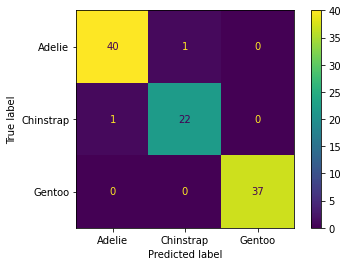

In [17]:
ConfusionMatrixDisplay.from_estimator(rfc,x_test,y_test)

In [18]:
print(classification_report(actual,prediction))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



# day 80 & day 81

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_banknote_authentication.csv')
df.head(5)

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.describe()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


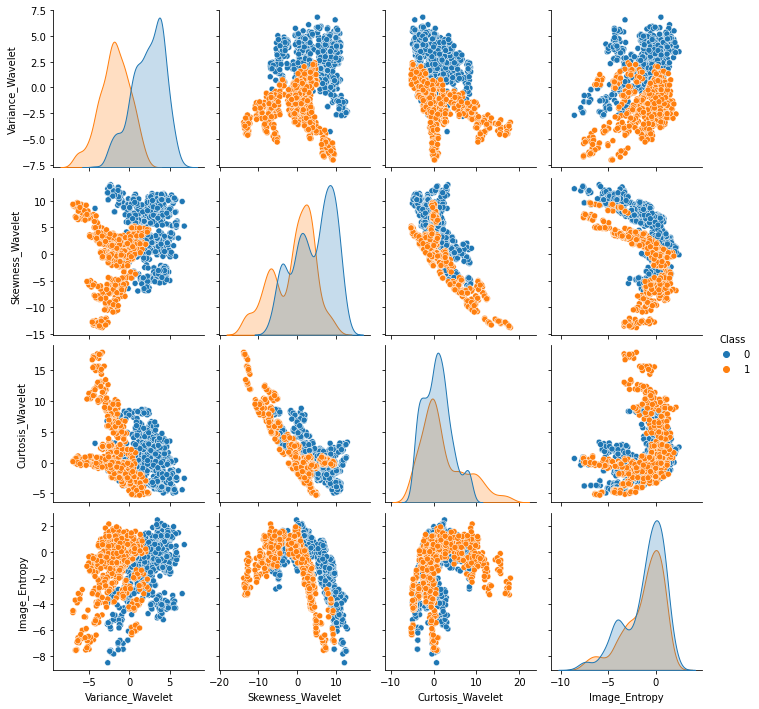

In [7]:
sns.pairplot(df,hue='Class')

# model building

In [6]:
x = df.drop('Class',axis=1)
y = df['Class']

# train_test_splitting 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=101)

# scaling is unneccessary, yields less accurate predictive model.
# # scaling the x features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x_train)
# scaled_x_train = scaler.transform(x_train)
# scaled_x_test = scaler.transform(x_test)

# gridsearch on RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# creating the paramaters to test and cross validate
n_estimators = [64,100,128,200]
max_features = ['auto','log2',2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}


# performing the grid search
grid_model = GridSearchCV(rfc,param_grid)
grid_model.fit(x_train,y_train)

actual = y_test
prediction = grid_model.predict(x_test)


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:

In [7]:
grid_model.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'n_estimators': 100,
 'oob_score': False}

# error metrics

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

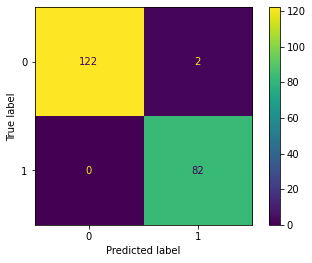

In [10]:
ConfusionMatrixDisplay.from_estimator(grid_model,x_test,y_test)

In [11]:
print(classification_report(actual,prediction))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



# lets see another model building based on the information from the instructor

* conclusion:
when doing the classification don't scale or normalize.

In [13]:
rfc = RandomForestClassifier(n_estimators=100,max_features='log2',bootstrap=True,oob_score=False)

rfc.fit(x_train,y_train)
actual = y_test
prediction = rfc.predict(x_test)


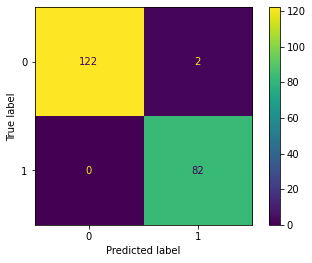

In [14]:
ConfusionMatrixDisplay.from_estimator(rfc,x_test,y_test)

In [15]:
print(classification_report(actual,prediction))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [17]:
np.sum(actual != prediction)

2

In [18]:
from sklearn.metrics import accuracy_score

# finding the errors and misclassifications

In [19]:
errors = []
misclassifications = []

for i in range(1,200): # starts with 1 because features can't be 0 or negative (a inf0-physical constraint)
    rfc = RandomForestClassifier(n_estimators=i,max_features='log2')
    
    # fitting the data
    rfc.fit(x_train,y_train)
    actual = y_test
    prediction = rfc.predict(x_test)
    
    error = 1-accuracy_score(actual,prediction)
    misclassification = np.sum(actual != prediction)
    
    errors.append(error)
    misclassifications.append(misclassification)
    

In [21]:
np.shape(errors)

(199,)

In [25]:
np.shape(misclassifications)

(199,)

# plotting the errors and misclassifications

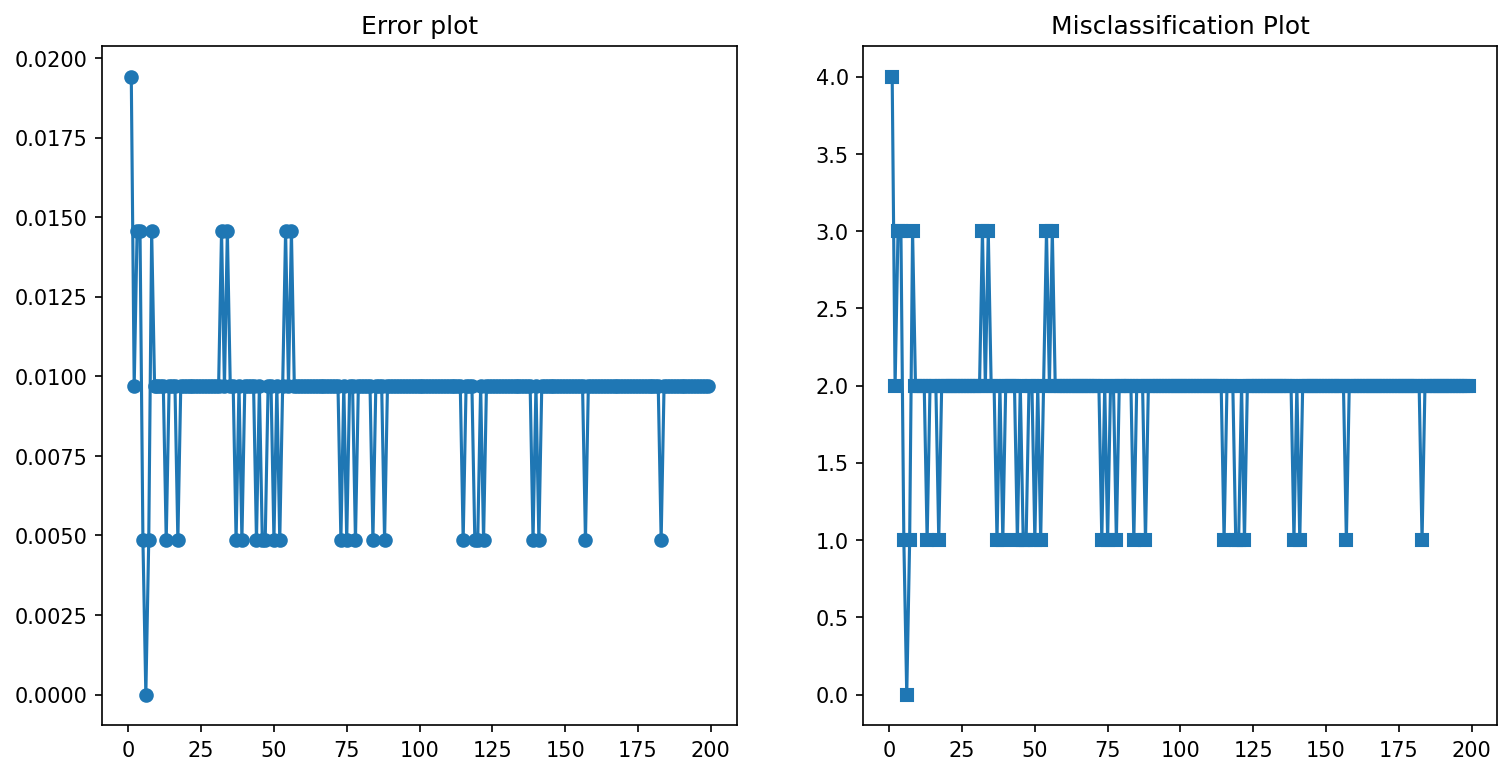

In [26]:

x = np.arange(1,200,1)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6),dpi=150)


ax[0].plot(x,errors,'o-')
ax[0].set_title('Error plot')

ax[1].plot(x,misclassifications,'s-')
ax[1].set_title('Misclassification Plot')

plt.show()

In [34]:
errors[np.argmin(errors)]

0.0

In [33]:
misclassifications[np.argmin(misclassifications)]

0

In [29]:
rfc = RandomForestClassifier(n_estimators=5,max_features='log2')

rfc.fit(x_train,y_train)
prediction = rfc.predict(x_test)
actual = y_test



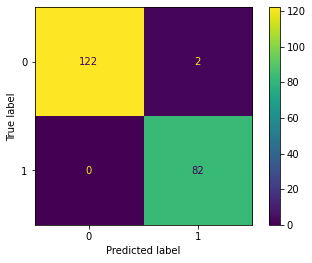

In [30]:
ConfusionMatrixDisplay.from_estimator(rfc,x_test,y_test)

In [31]:
print(classification_report(actual,prediction))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



In [35]:
accuracy_score(actual,prediction)

0.9902912621359223

# conclusions

* Adding more trees or estimators do not overfit but hit a ceiling in performance in random forest

* error plot and misclassification plot just informed us about having just 5 estimators is enough to get a pretty accurate prediction model

# Random Forest Regression

In [5]:
df = pd.read_csv('rock_density_xray.csv')
df.head(10)

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
5,89.647973,2.499600
6,69.492733,2.385000
7,20.150520,2.500673
8,82.256337,2.700880
9,64.424802,2.220781


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [7]:
df.describe()


,Rebound Signal Strength nHz,Rock Density kg/m3
count,300.000000,300.000000
mean,49.725766,2.225063
std,28.341792,0.314512
min,0.700227,1.500000
25%,25.685798,1.987830
50%,50.602886,2.268597
75%,74.854294,2.476944
max,98.831658,2.750000


# conclusion

* mean and std don't mean much for the rebound signal as the signal exhibits a sinusoidal wave pattern which means it has many troughs and peaks that means mean and median are not going to be a good measure of centrality. mode might pull off this task with breeze. 

# changing the column names for ease of acess

In [8]:
df.columns = ['signal','density']

In [9]:
df.head(5)

,signal,density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


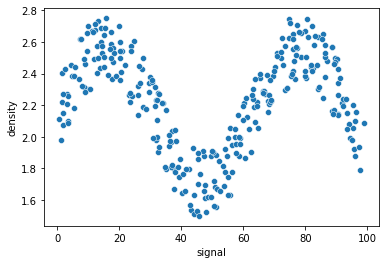

In [10]:
sns.scatterplot(data=df,x='signal',y='density')

plt.show()

# finding the linear regression for the above plot (it will give an awkward result for sure)

In [11]:
# x & y
# if the data has a single feature then reshape it (-1,1). format: .values.reshape(-1,1)
x = df['signal'].values.reshape(-1,1)
y = df['density']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=101)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train,y_train)
actual = y_test
prediction = lr.predict(x_test)



# plotting to see what is wrong with the linear model. 

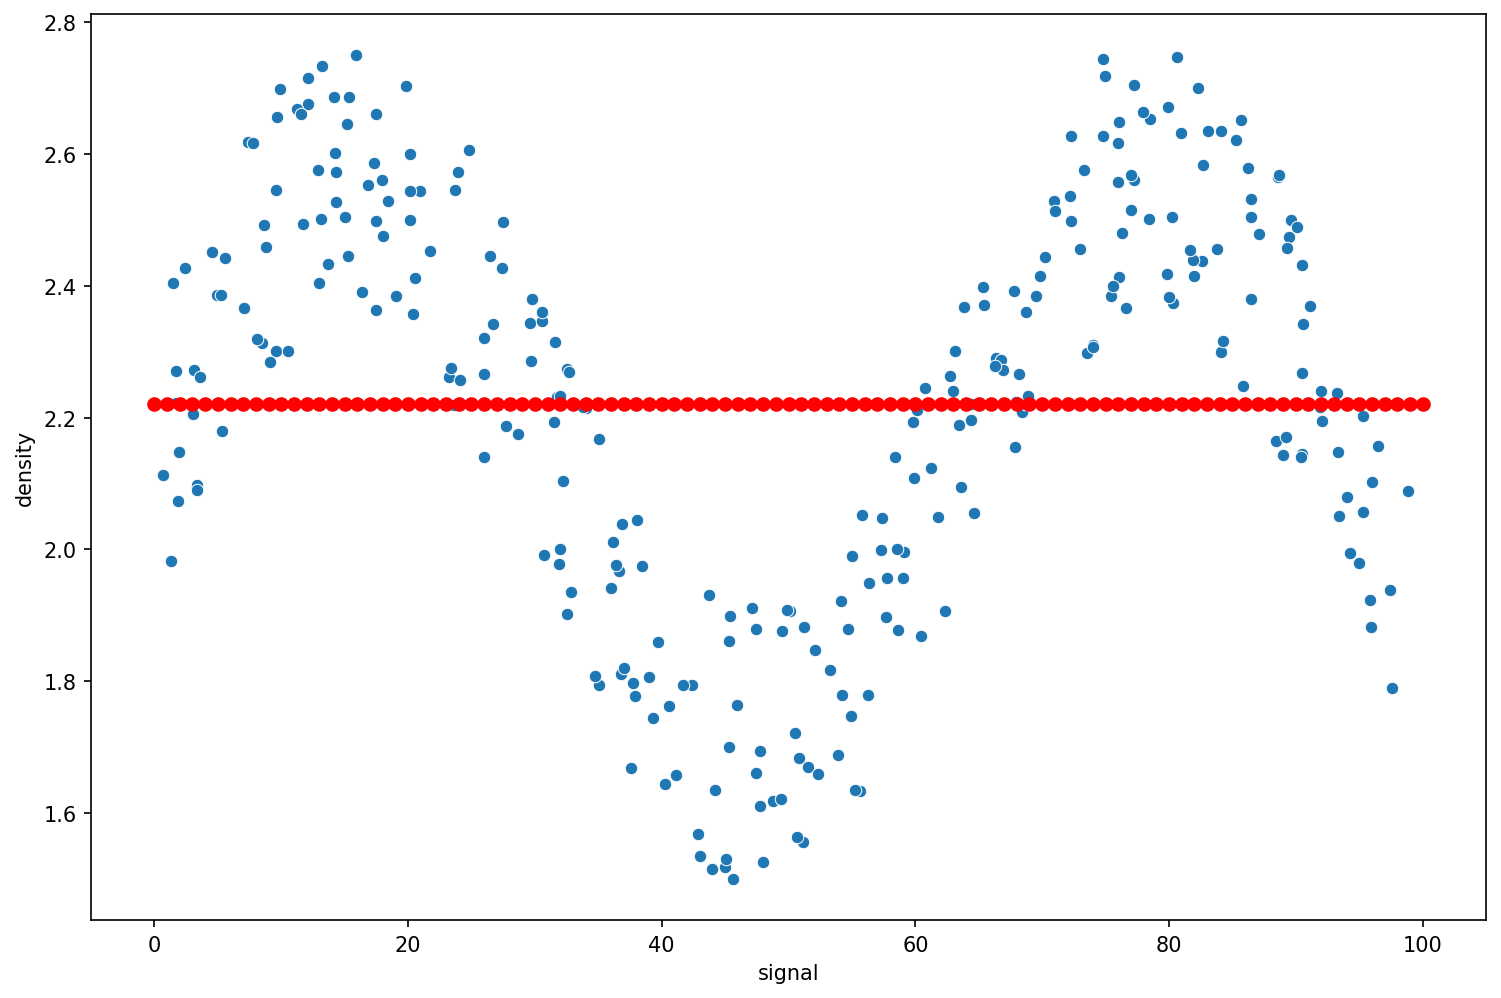

In [12]:
plt.figure(figsize=(12,8),dpi=150)

sns.scatterplot(data=df,x='signal',y='density')

x = np.arange(0,101,1).reshape(-1,1)
y = lr.predict(x)
plt.plot(x,y,'ro-')

plt.show()

In [61]:
x[0:10]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [63]:
y[0:10]

array([2.24194868, 2.2416091 , 2.24126952, 2.24092995, 2.24059037,
       2.24025079, 2.23991122, 2.23957164, 2.23923206, 2.23889249])

In [64]:
np.shape(x)

(101, 1)

In [65]:
np.shape(y)

(101,)

# conclusion:

* see the plot and observe what type of effect did the model had on the reality. 
* don't rely fully  on the descriptive statistics. see and believe. don't believe based on thresholds. 


# creating a function to have it all inside.

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [14]:
def show(model,x_train,x_test,y_train,y_test):
    # fit the model
    model.fit(x_train,y_train)
    actual = y_test
    prediction = model.predict(x_test)
    
    # print the error scores
    mae = mean_absolute_error(actual,prediction)
    rmse = np.sqrt(mean_squared_error(actual,prediction))
    
    print('MAE: %s'%(mae))
    print('RMSE: %s'%(rmse))
    
    # plot the model against the original plot
    plt.figure(figsize=(12,8),dpi=150)

    sns.scatterplot(data=df,x='signal',y='density')

    x = np.arange(0,101,1).reshape(-1,1)
    y = model.predict(x)
    plt.plot(x,y,'ro-')

    plt.show()

MAE: 0.211198973318633
RMSE: 0.2570051996584629


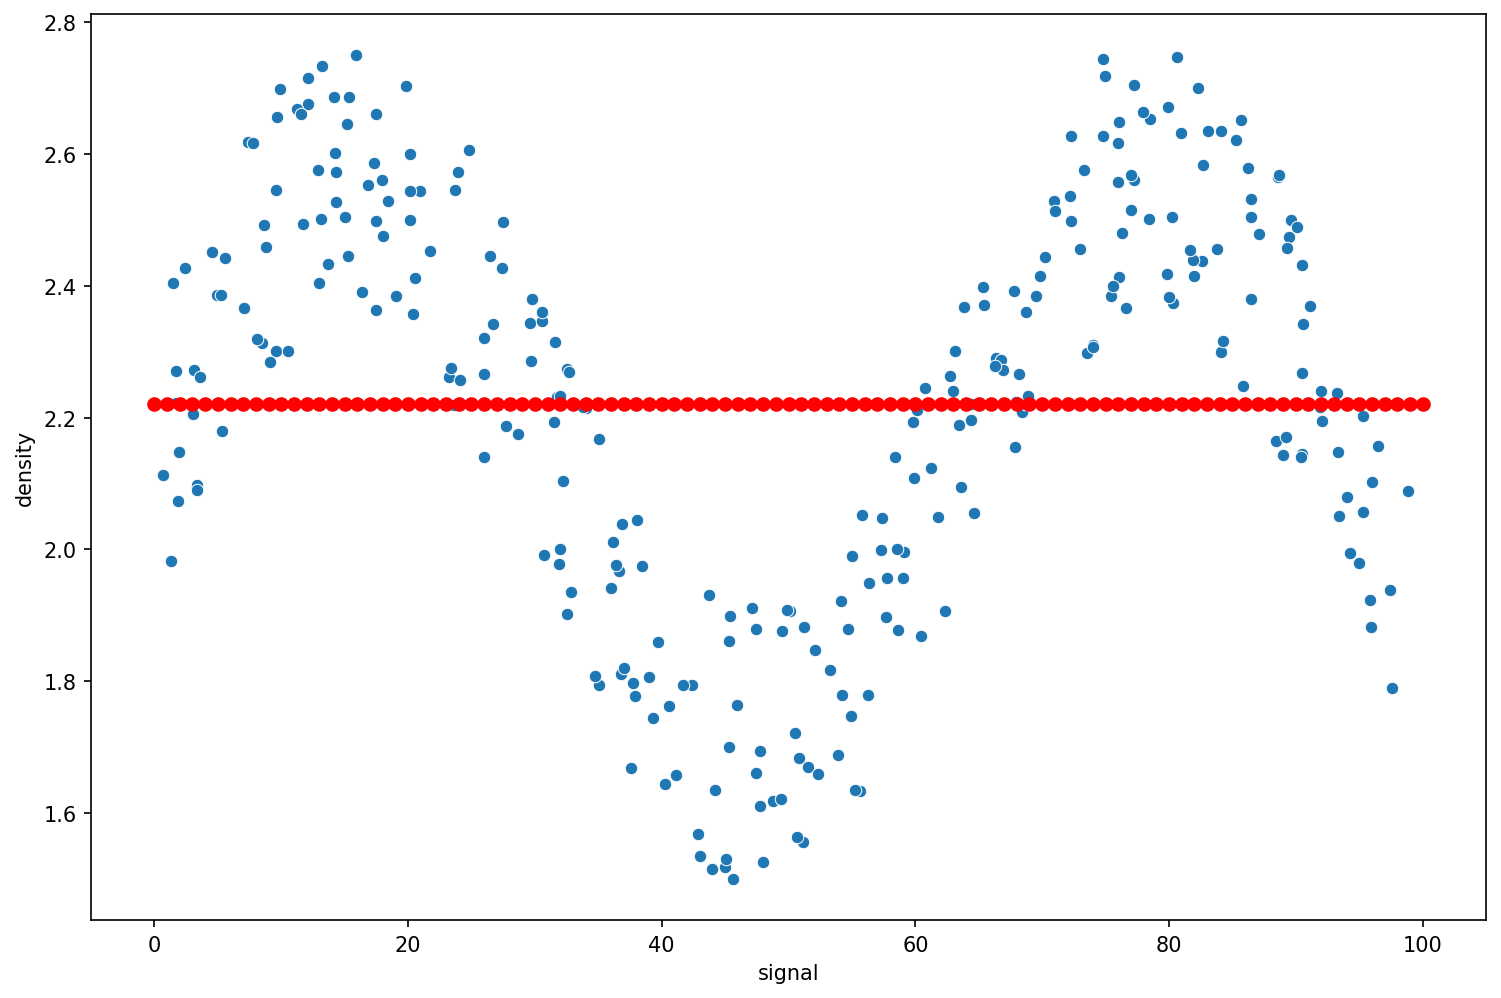

In [15]:
model = LinearRegression()
show(model,x_train,x_test,y_train,y_test)

# fitting with polynomial models (x**2 , x**3)

MAE: 0.11923532431365527
RMSE: 0.135445005518806


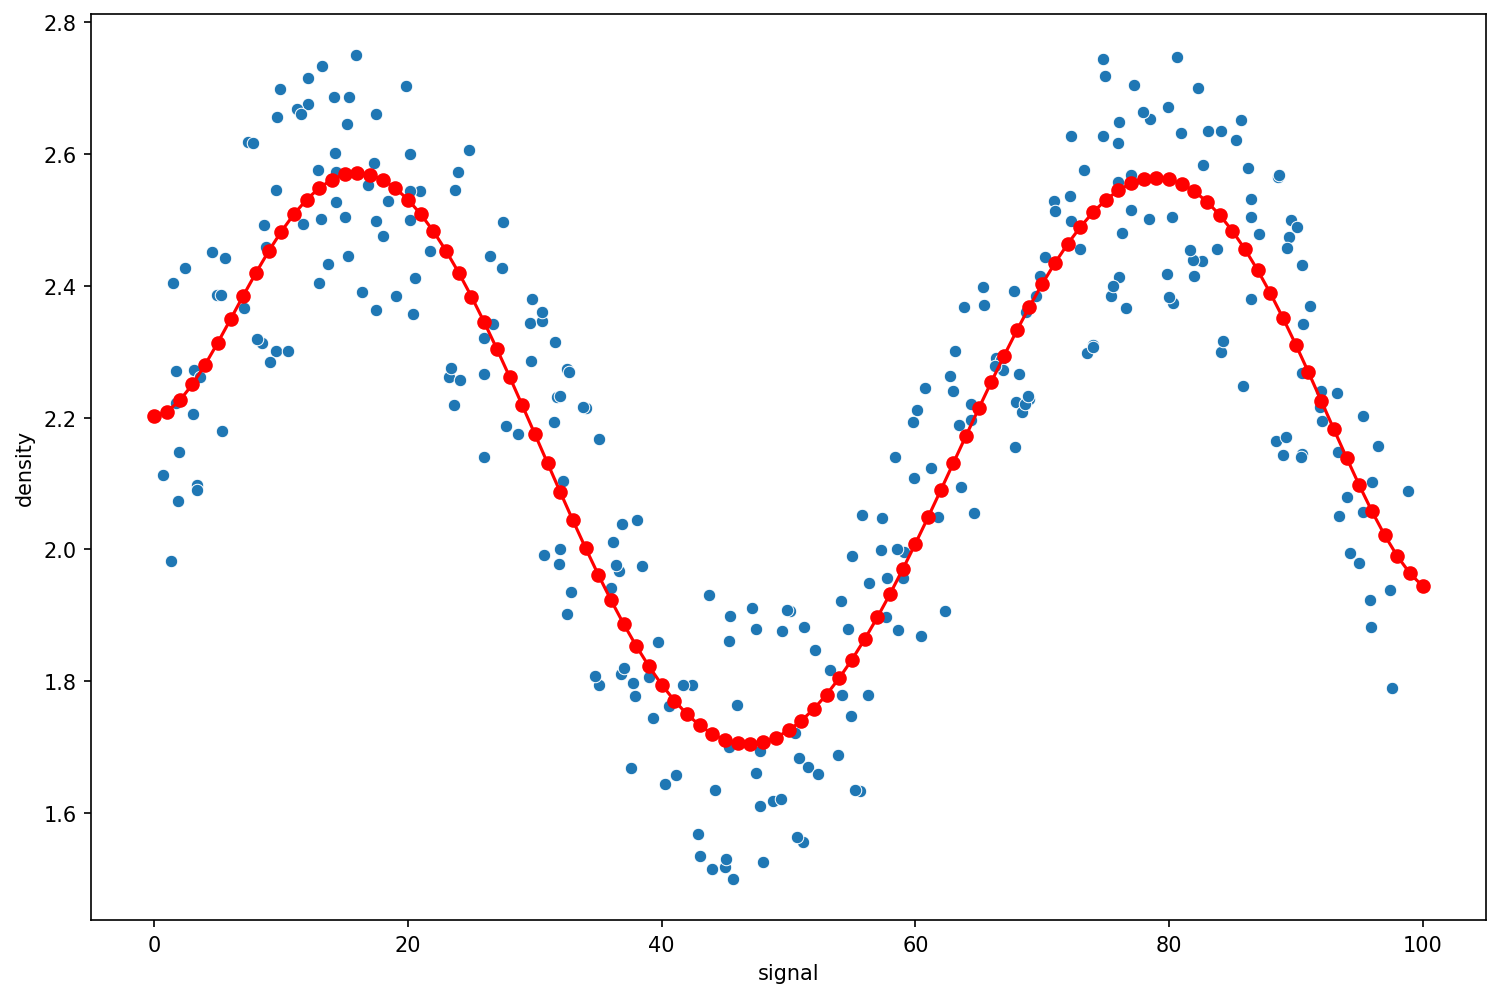

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(PolynomialFeatures(degree=8),LinearRegression())
model = pipe

show(model,x_train,x_test,y_train,y_test)

# advanced models to help us predict the future (beyond the thereshold where our current data points end)

In [19]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


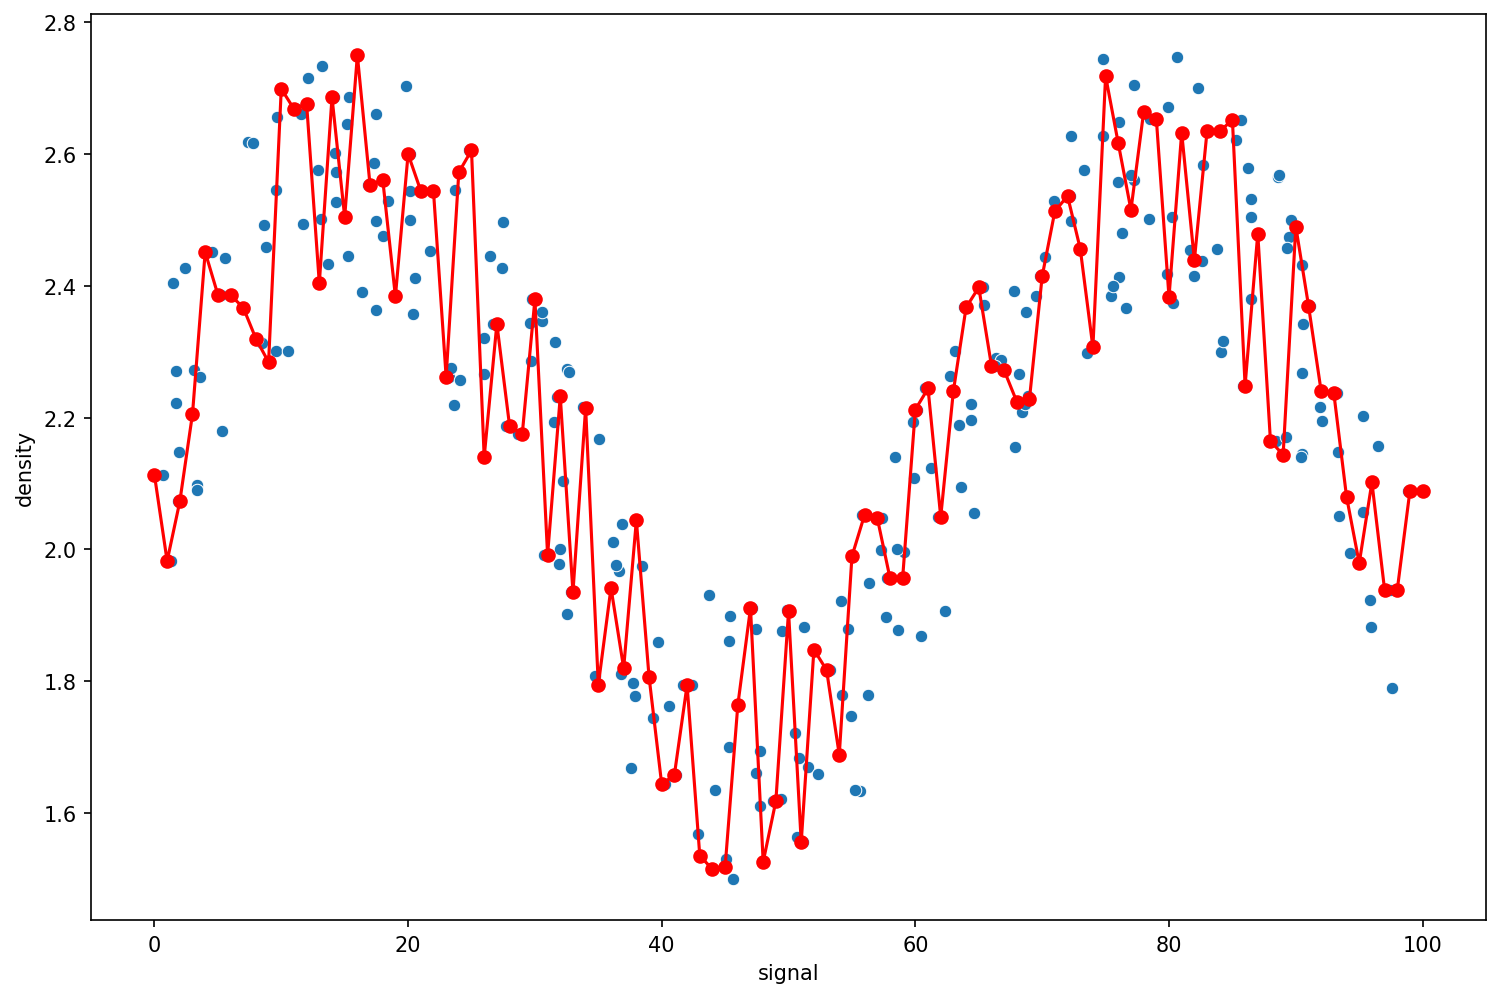

MAE: 0.12198383614100558
RMSE: 0.13730685016923647


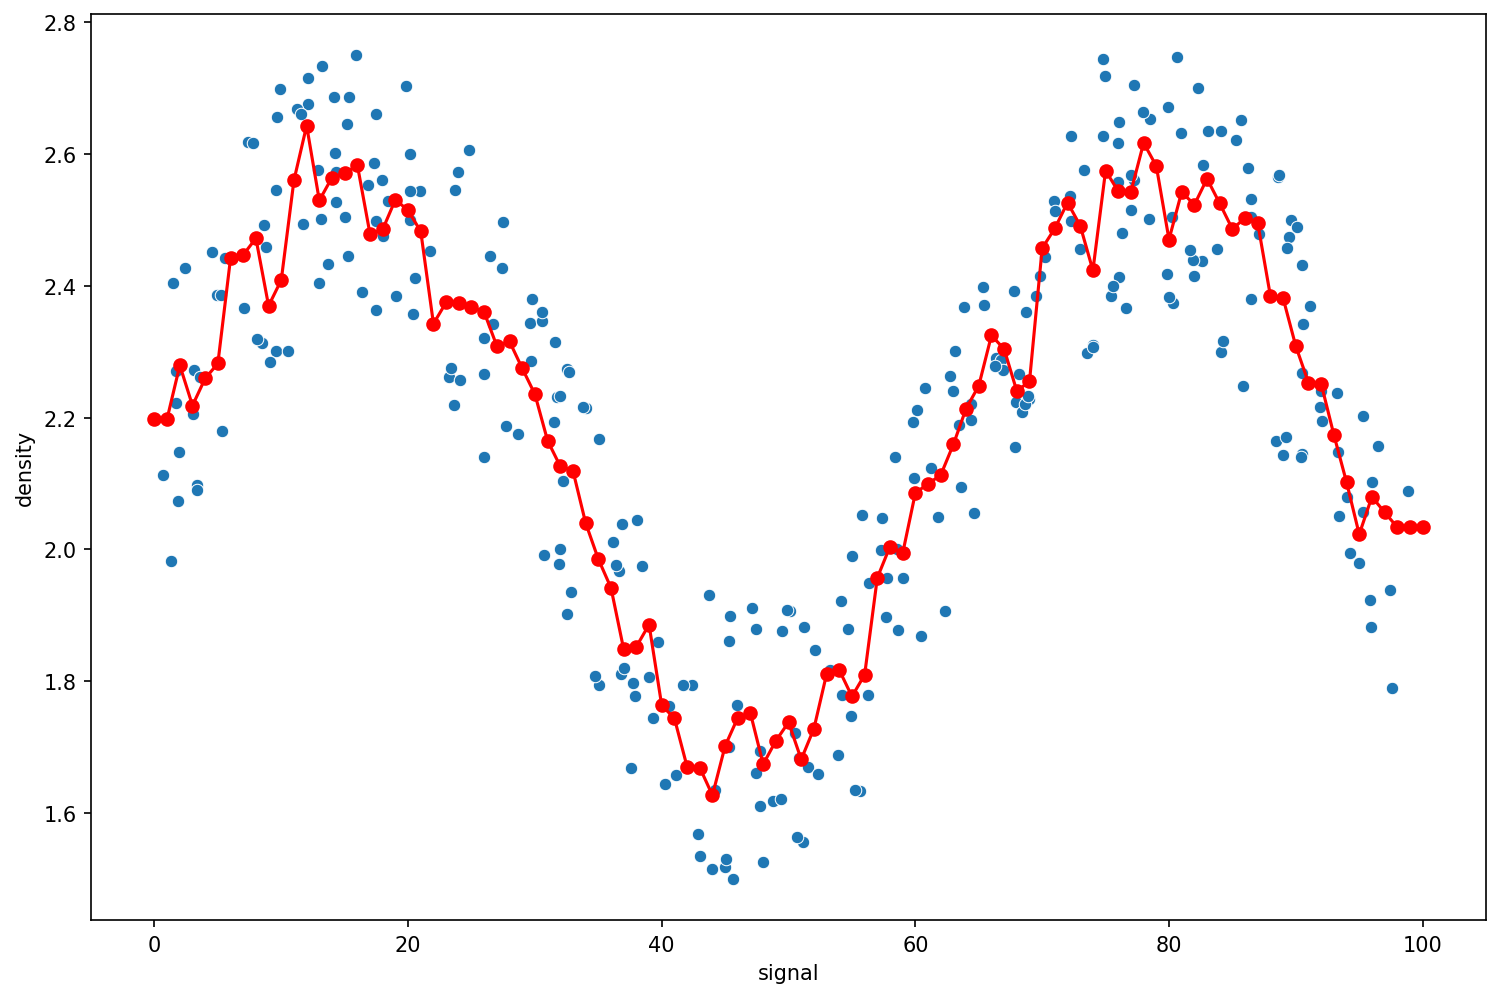

MAE: 0.12100558240138312
RMSE: 0.1384265533347639


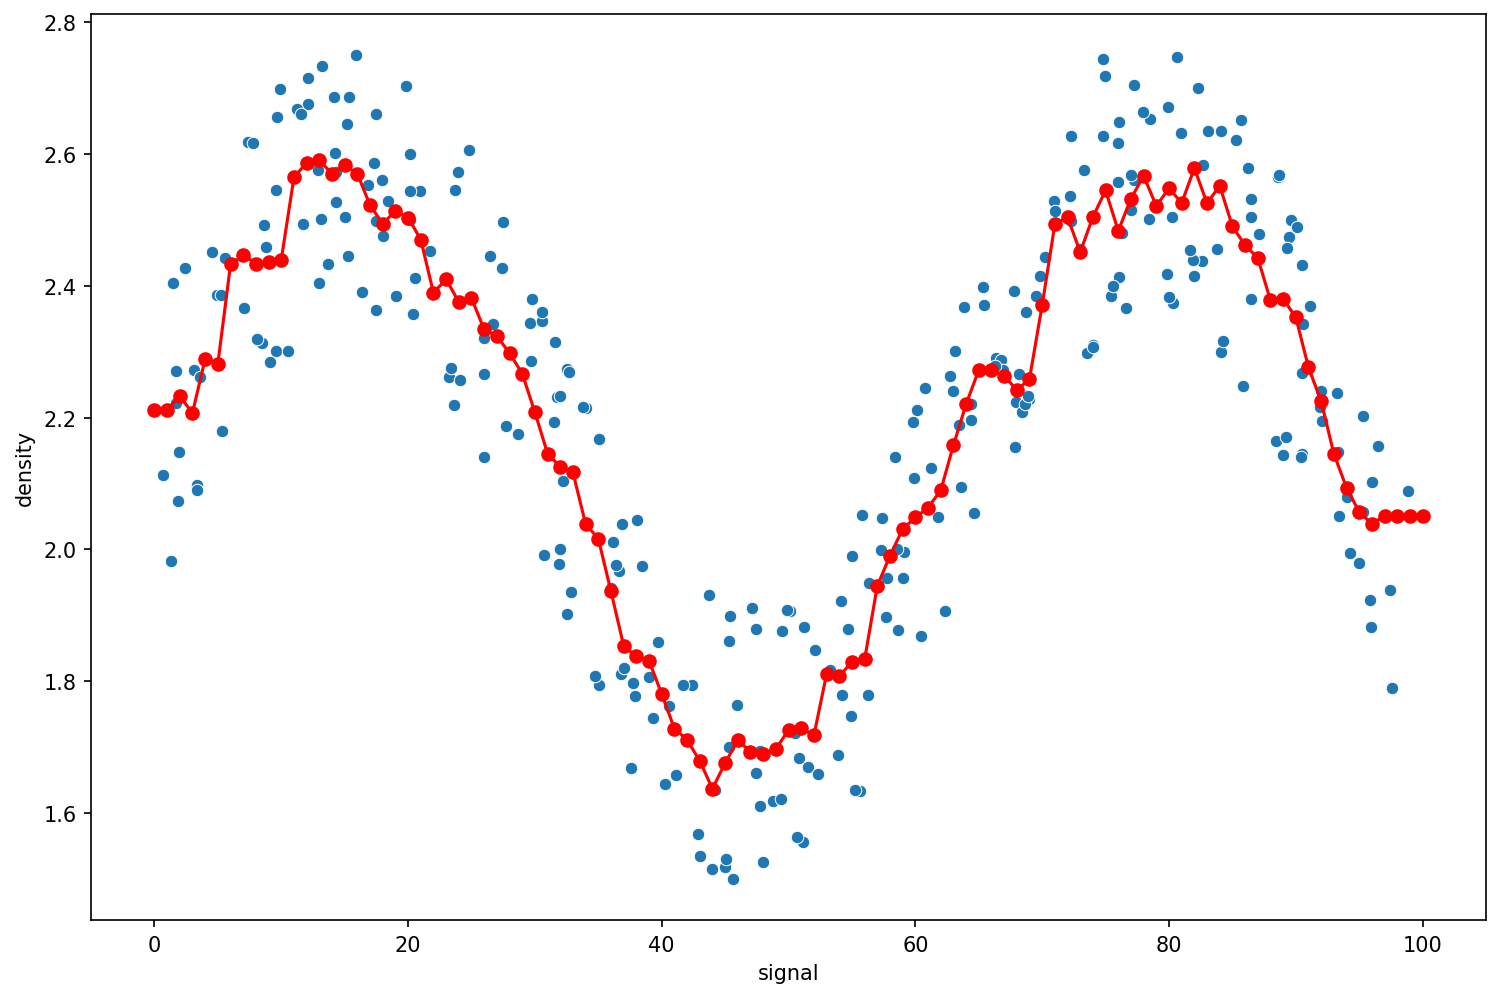

MAE: 0.11635971693292672
RMSE: 0.13277855732740926


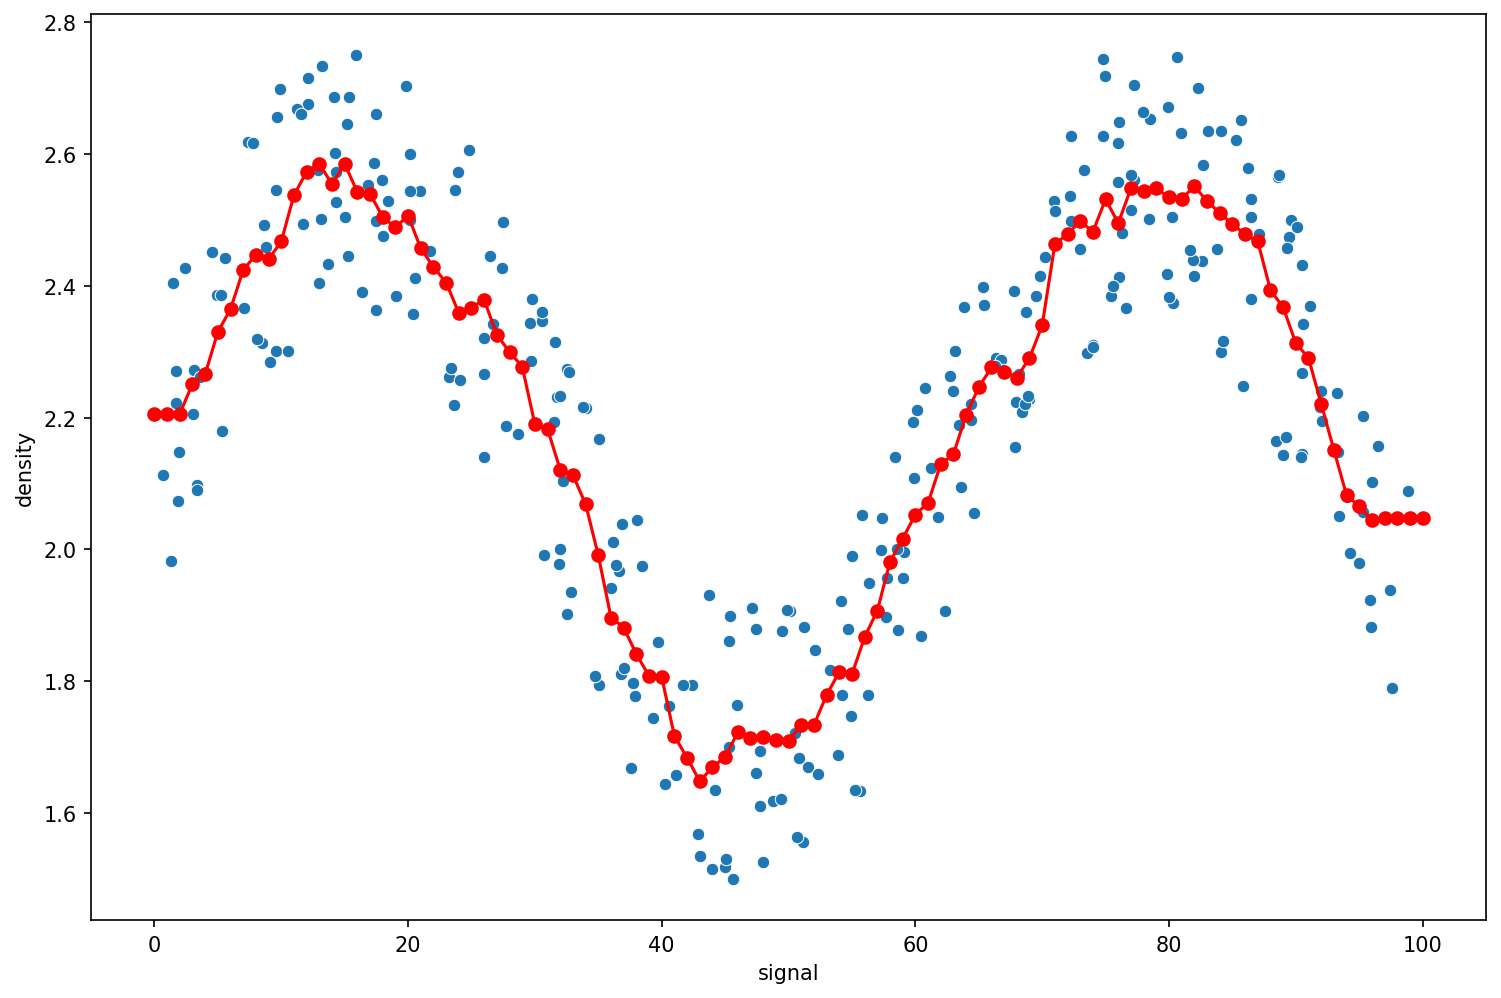

MAE: 0.11561598074223124
RMSE: 0.13351482702752904


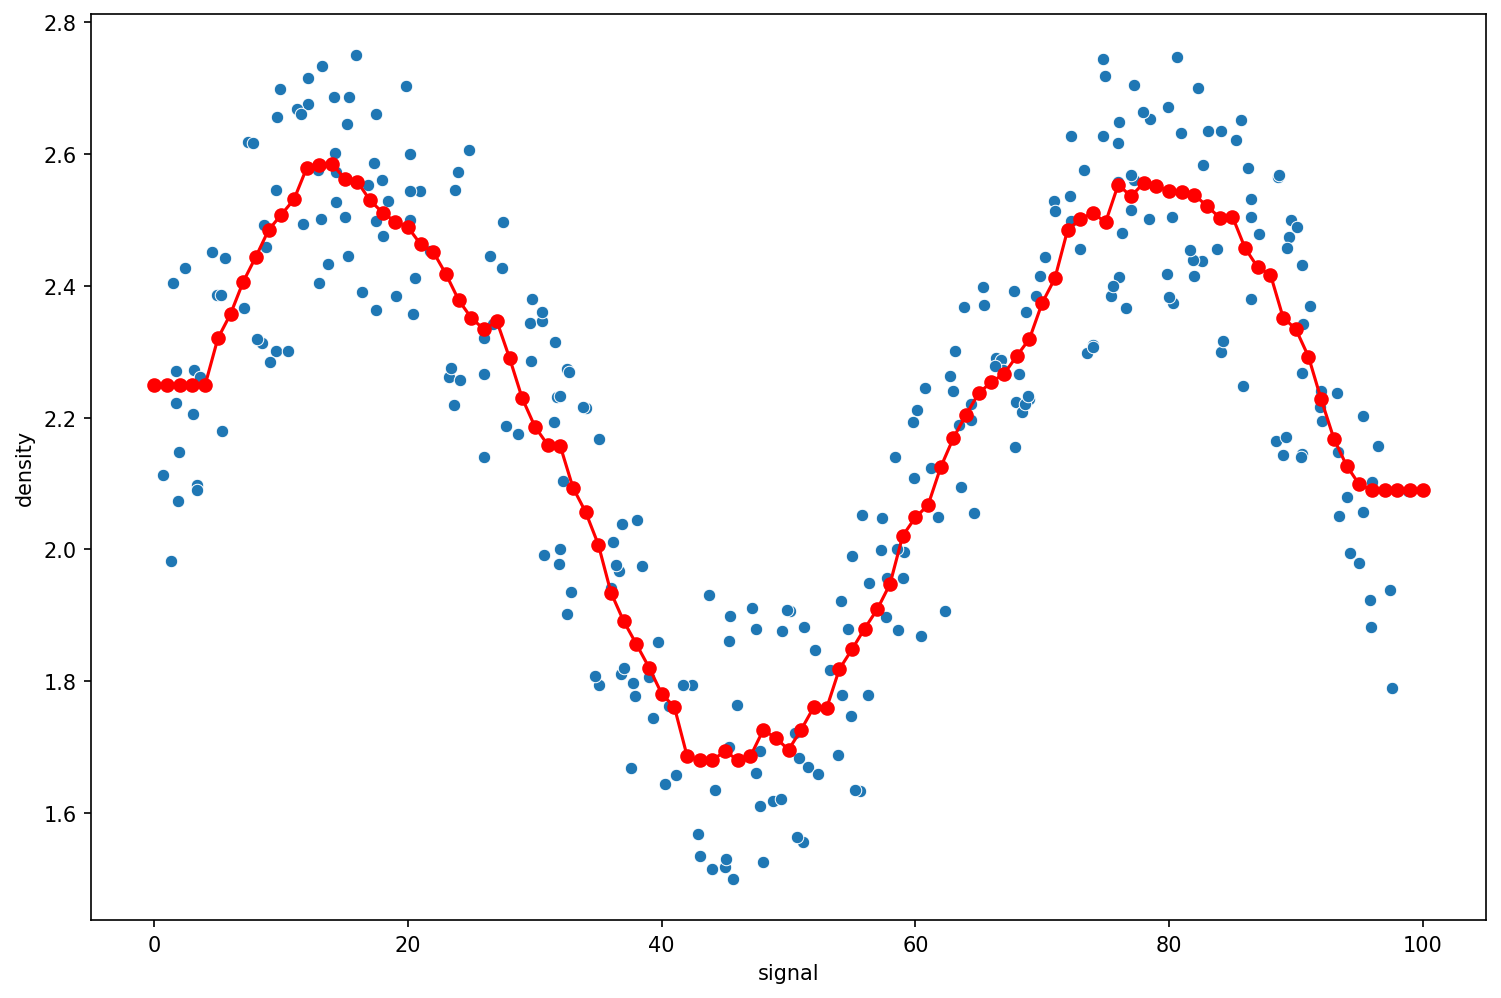

MAE: 0.12878322504026188
RMSE: 0.151321497164368


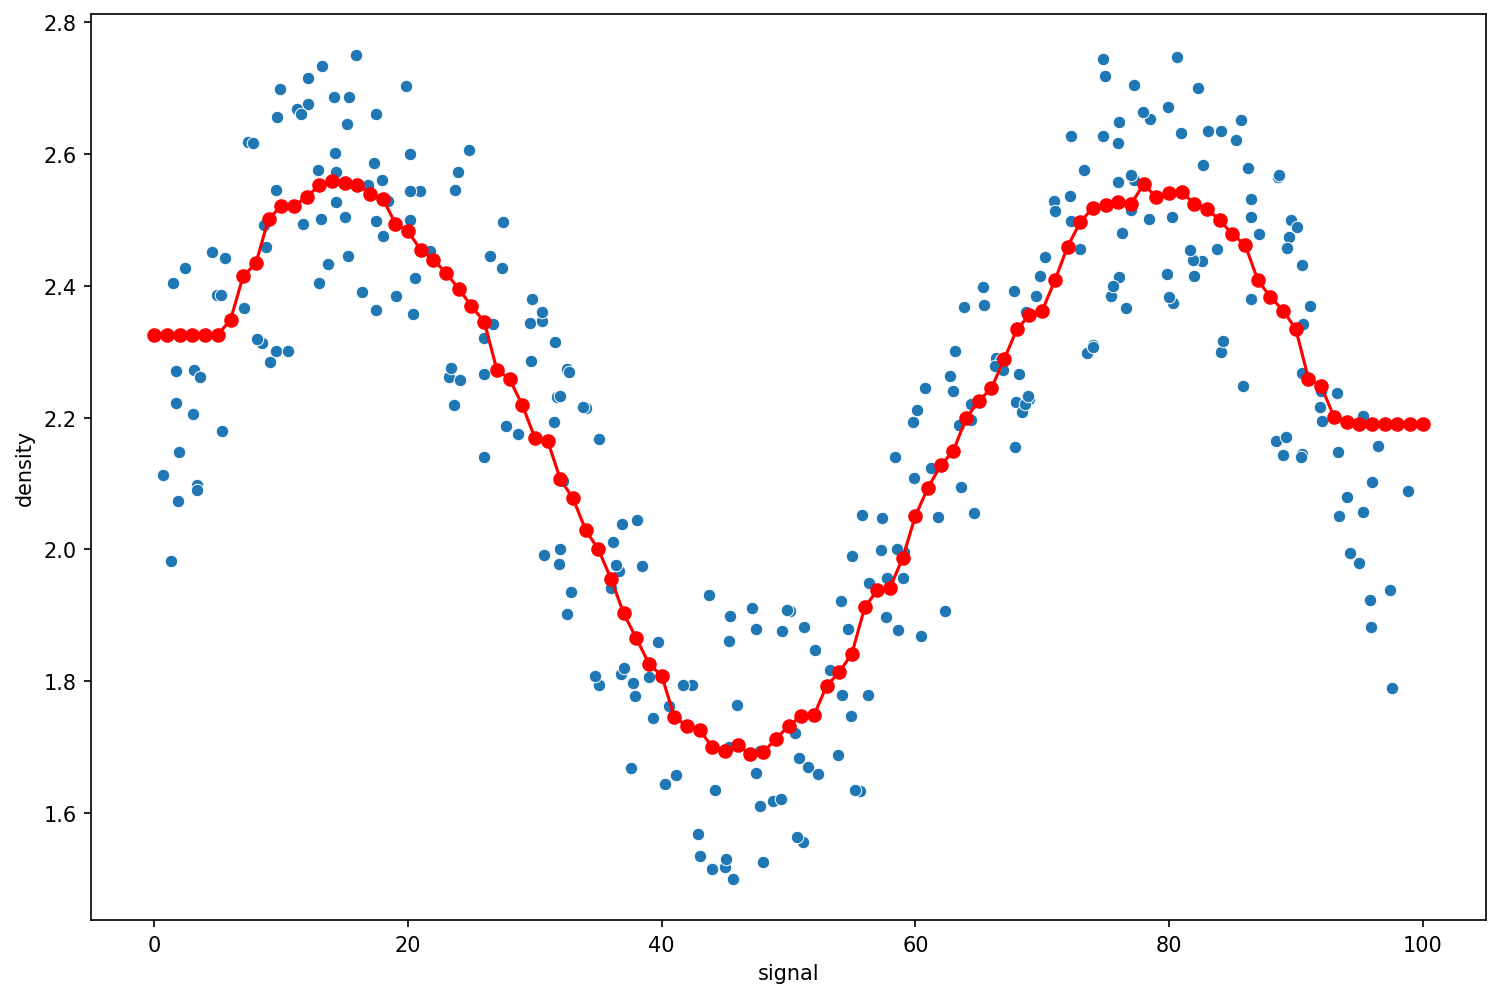

MAE: 0.13363165935705318
RMSE: 0.15954234753677107


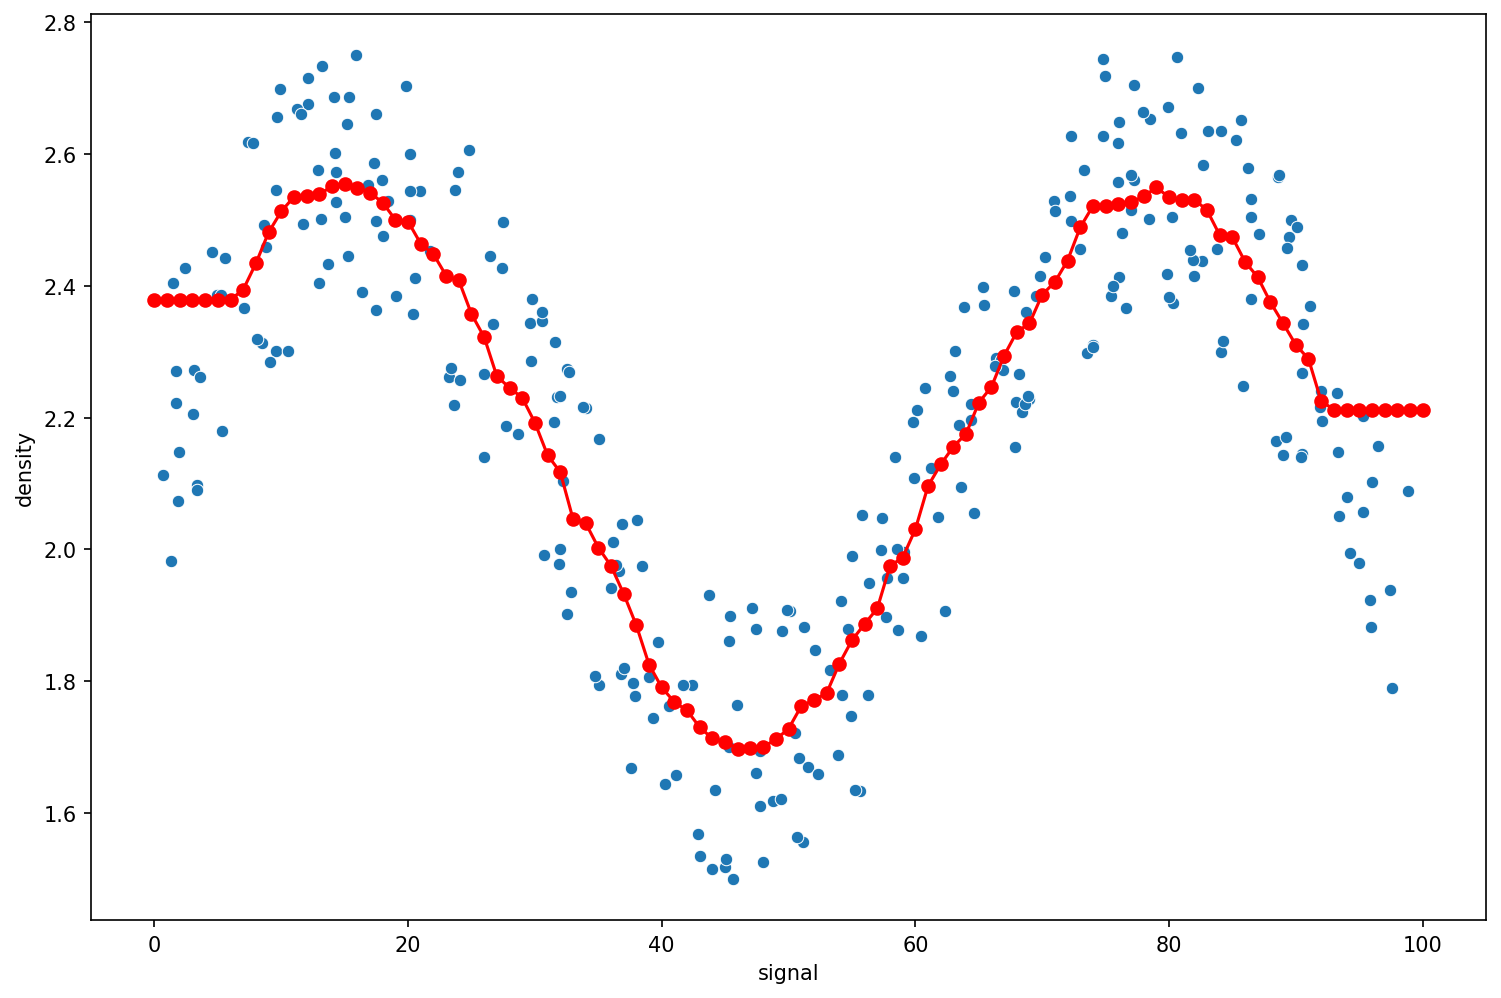

MAE: 0.1519201332418925
RMSE: 0.1886961065920868


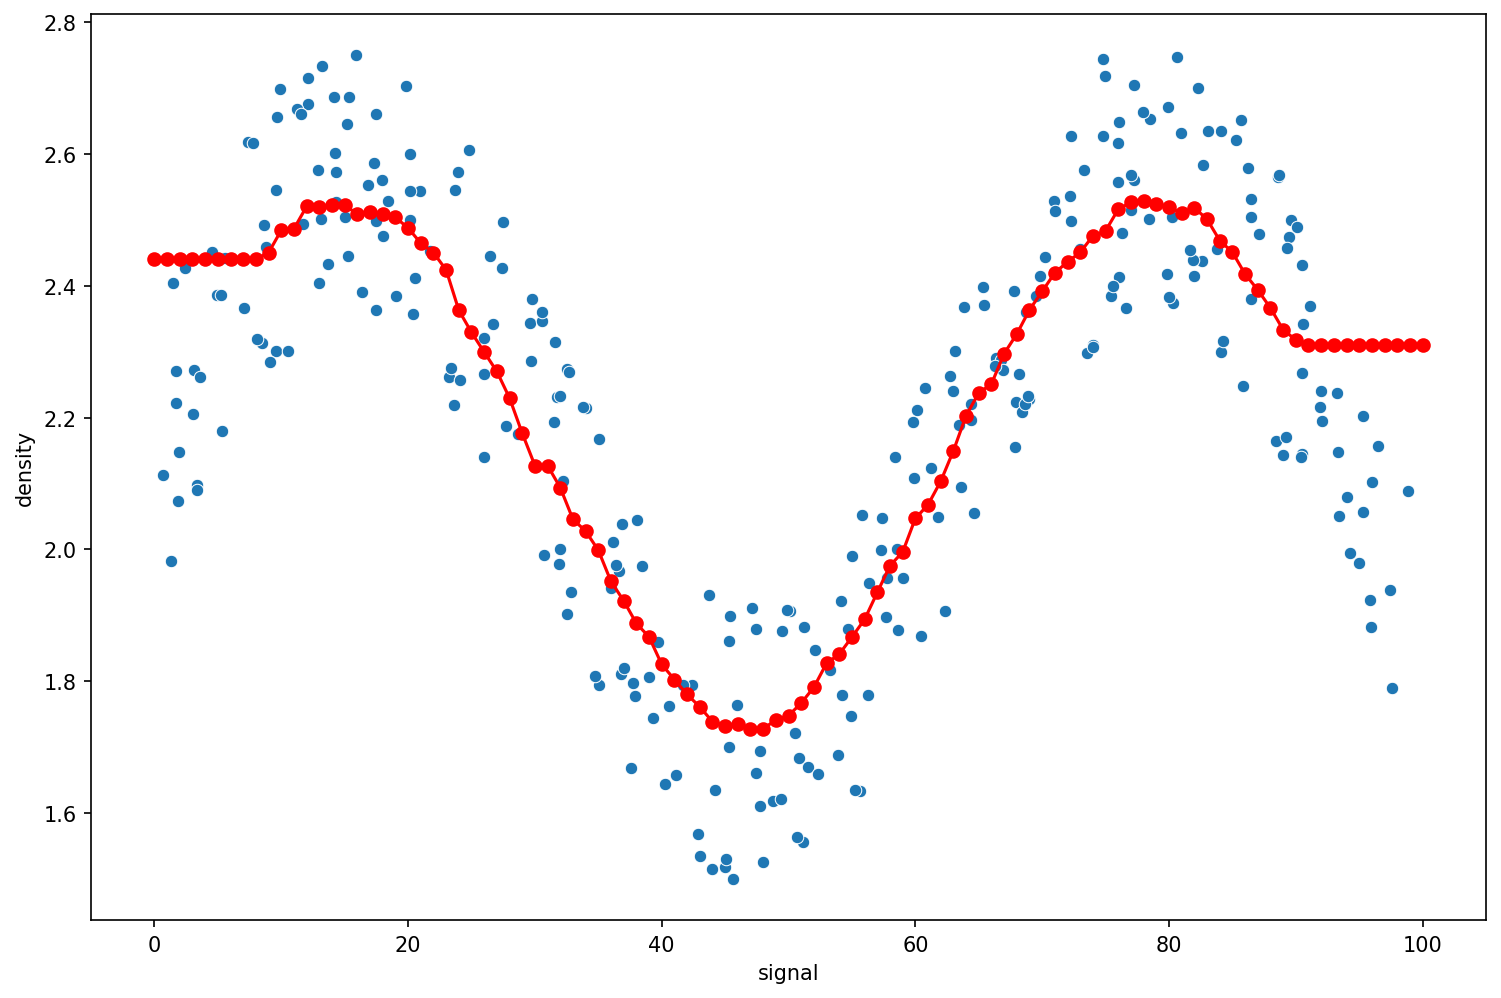

In [21]:

k = [1,5,8,10,15,25,30,45]

for n in k:
    model = KNeighborsRegressor(n_neighbors=n)
    show(model,x_train,x_test,y_train,y_test)
    

# seeing how the model behaves with decision tree regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


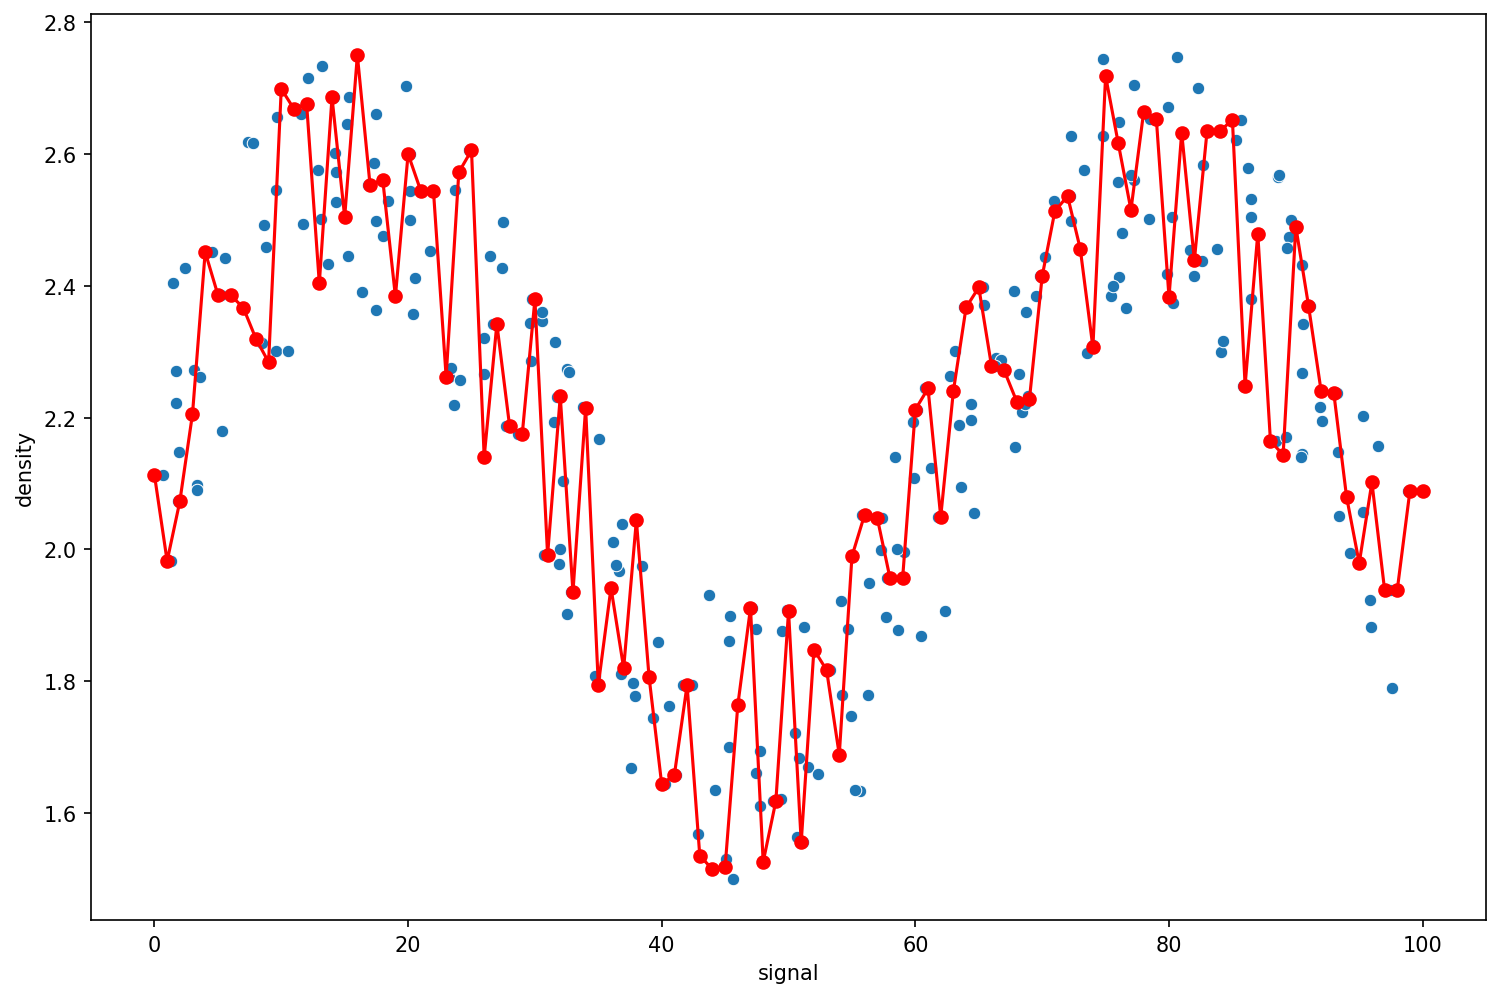

In [23]:
model = DecisionTreeRegressor()
show(model,x_train,x_test,y_train,y_test)

# seeing how the model behaves with Support Vector Machine

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


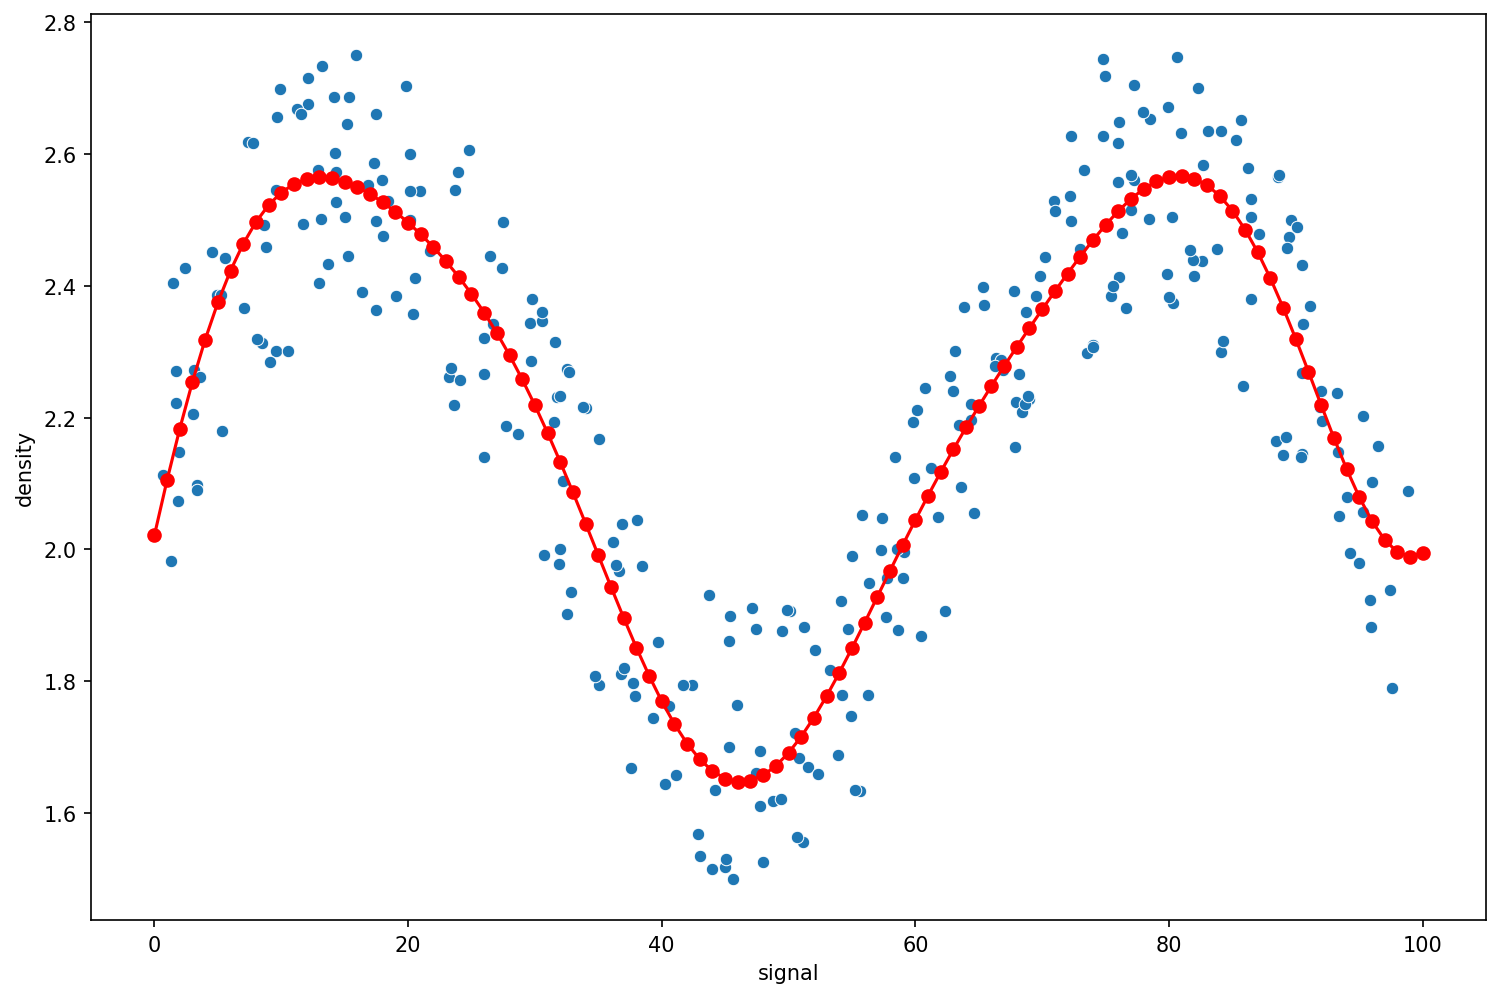

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV



model = SVR()

# we need to do grid search to get the best hyperparameter values for SVR model.

param_grid = {'C':[0.01,0.1,0.25,0.7,1,10,100,1000],'gamma':['auto','scale']}

grid = GridSearchCV(model,param_grid)

show(grid,x_train,x_test,y_train,y_test)

# conclusion:

* this seems to be pretty good  compared to all other apriori models.

MAE: 0.11116285387074734
RMSE: 0.13259256291053909


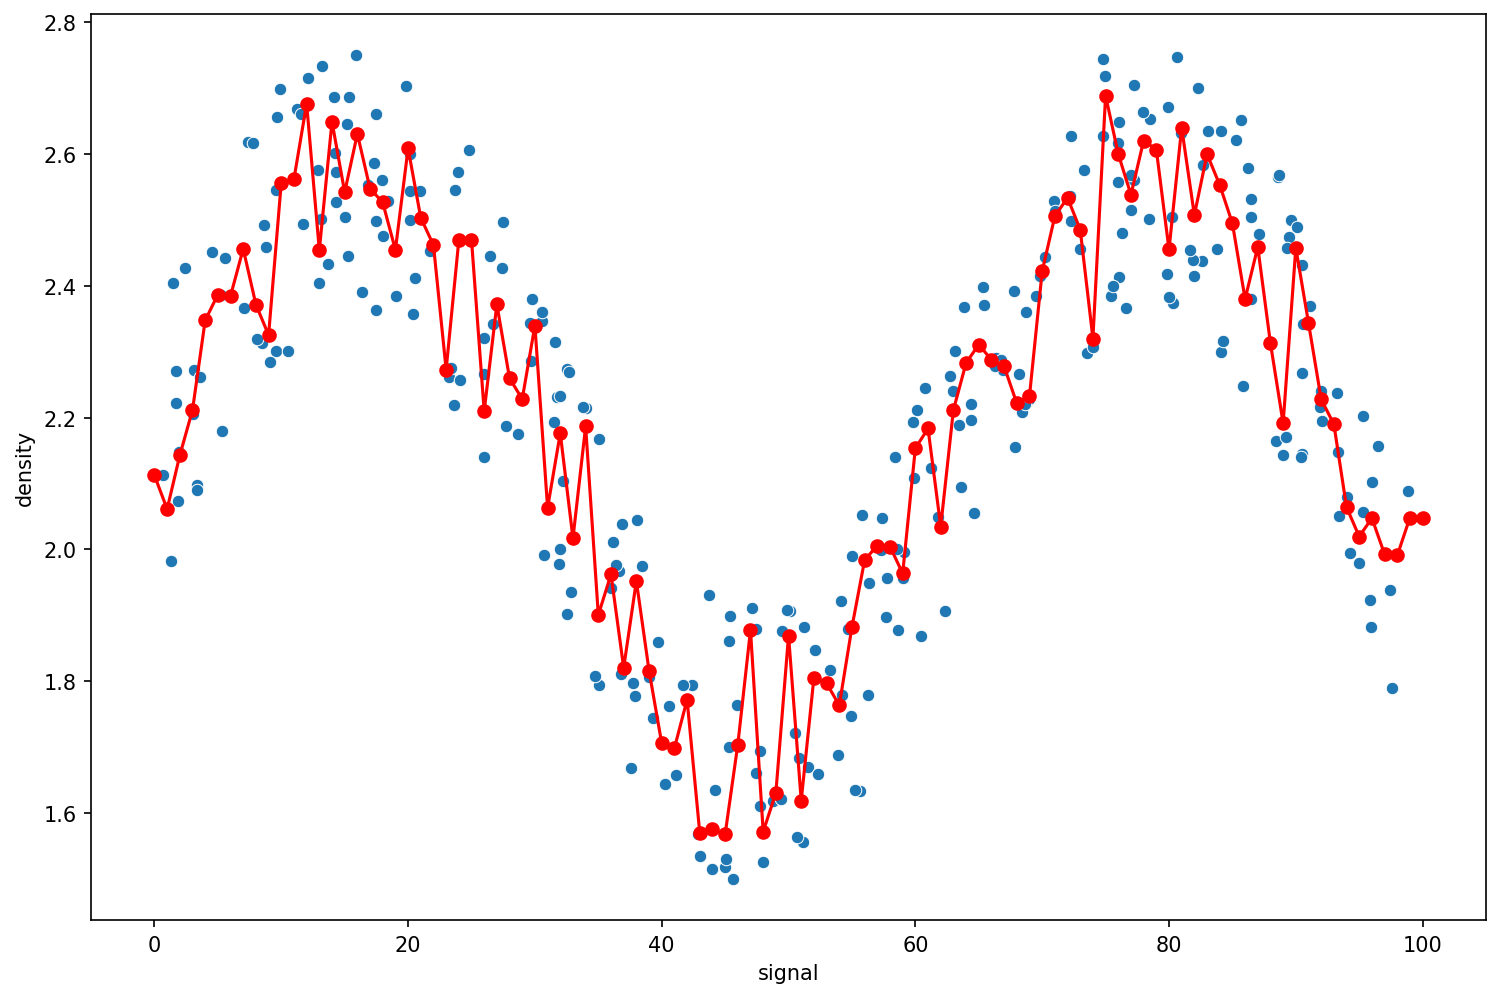

In [30]:
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(n_estimators=128)

show(rfr,x_train,x_test,y_train,y_test)